<a href="https://colab.research.google.com/github/macdet/AppleHardwareTest/blob/master/Page_Speed_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please save a copy of the script to your drive to use it :) 
If you have any issues feel free to email me ruth.everett@deepcrawl.com or on Twitter @rvtheverett. 

To use run each cell at a time and upload your csv file when prompted. The first two steps are optional for testing the packages are installed, the API call is set up correctly and the results are able to be printed. 

**PLEASE NOTE:** As this is using the API  I would recommend just using a small set of URLs at a time, especially if you have a large site. For example, you could use your highest trafficked pages, or pages which generate the most revenue. Alternatively if you use templates it would be great for testing sets of these.

Step 1: Import required packages


In [ ]:
# Import required packages 
import json
import requests
import pandas as pd
import urllib
import time
from google.colab import files
import io

**Optional Step:** Running one URL through the API to test 

{
  "captchaResult": "CAPTCHA_NOT_NEEDED",
  "kind": "pagespeedonline#result",
  "id": "https://www.asos.com/women//",
  "loadingExperience": {
    "id": "https://www.asos.com",
    "metrics": {
      "FIRST_CONTENTFUL_PAINT_MS": {
        "percentile": 1619,
        "distributions": [
          {
            "min": 0,
            "max": 1000,
            "proportion": 0.41291929917060355
          },
          {
            "min": 1000,
            "max": 3000,
            "proportion": 0.53421428779812619
          },
          {
            "min": 3000,
            "proportion": 0.0528664130312705
          }
        ],
        "category": "AVERAGE"
      },
      "FIRST_INPUT_DELAY_MS": {
        "percentile": 51,
        "distributions": [
          {
            "min": 0,
            "max": 100,
            "proportion": 0.8458443845137078
          },
          {
            "min": 100,
            "max": 300,
            "proportion": 0.10264087511499136
          },
          
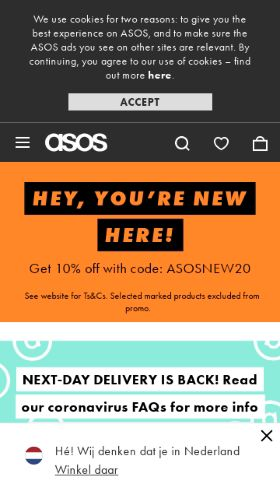
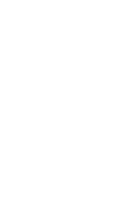
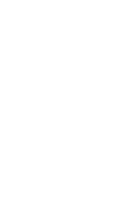
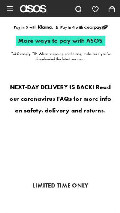
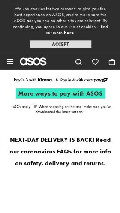
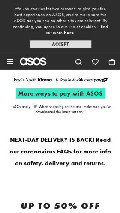
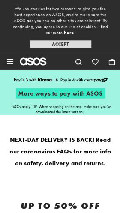
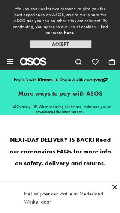
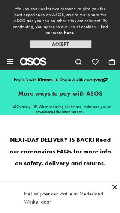
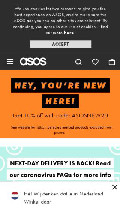
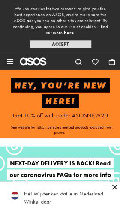

In [ ]:
# Define URL  
url = 'https://www.asos.com/women/'

# API request url
result = urllib.request.urlopen('https://www.googleapis.com/pagespeedonline/v5/runPagespeed?url={}/&strategy=mobile'\
                                 .format(url)).read().decode('UTF-8')
print(result)


**Optional Step:** Converting to JSON format to download and analyse for single URL



{'captchaResult': 'CAPTCHA_NOT_NEEDED', 'kind': 'pagespeedonline#result', 'id': 'https://www.asos.com/women//', 'loadingExperience': {'id': 'https://www.asos.com', 'metrics': {'FIRST_CONTENTFUL_PAINT_MS': {'percentile': 1619, 'distributions': [{'min': 0, 'max': 1000, 'proportion': 0.41291929917060355}, {'min': 1000, 'max': 3000, 'proportion': 0.5342142877981262}, {'min': 3000, 'proportion': 0.0528664130312705}], 'category': 'AVERAGE'}, 'FIRST_INPUT_DELAY_MS': {'percentile': 51, 'distributions': [{'min': 0, 'max': 100, 'proportion': 0.8458443845137078}, {'min': 100, 'max': 300, 'proportion': 0.10264087511499136}, {'min': 300, 'proportion': 0.05151474037130089}], 'category': 'FAST'}, 'CUMULATIVE_LAYOUT_SHIFT_SCORE': {'percentile': 26, 'distributions': [{'min': 0, 'max': 10, 'proportion': 0.5903647526376}, {'min': 10, 'max': 25, 'proportion': 0.14418740085316278}, {'min': 25, 'proportion': 0.2654478465092373}], 'category': 'SLOW'}, 'LARGEST_CONTENTFUL_PAINT_MS': {'percentile': 3239, 'dist
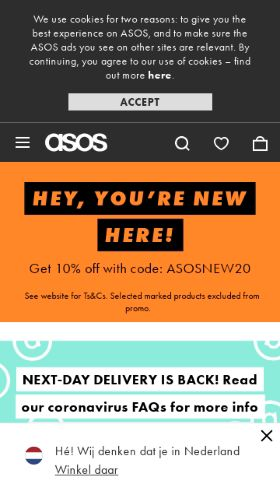
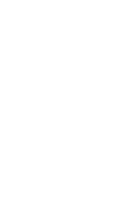
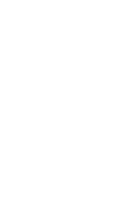
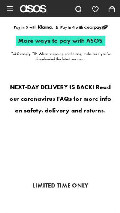
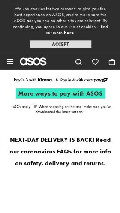
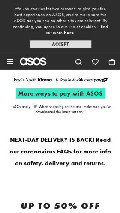
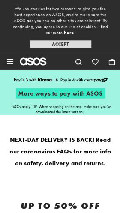
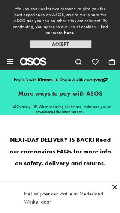
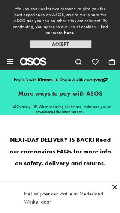
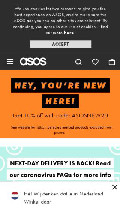
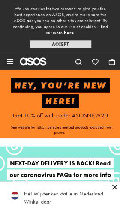

In [ ]:
# Convert to json format
result_json = json.loads(result)

print(result_json)

with open('result.json', 'w') as outfile:
  json.dump(result_json, outfile)

files.download('result.json')

Upload a csv file of URLs, ensure the column header is titled 'url' (if not, please define the column header as the variable where instructed)




In [ ]:
uploaded = files.upload()
#if your column header is something other than 'url' please define it here 
column_header='url'


Saving urls.csv to urls.csv


Turning csv file into a Pandas dataframe and reviewing 


In [ ]:
# Get the filename from the upload so we can read it into a CSV.
for key in uploaded.keys():
  filename = key
# Read the selected file into a Pandas Dataframe
df = pd.read_csv(io.BytesIO(uploaded[filename]))

df.head()
 

,url
0,https://www.deepcrawl.com/
1,https://www.deepcrawl.com/pricing/
2,https://www.deepcrawl.com/blog/
3,https://www.deepcrawl.com/knowledge/hangout-li...
4,https://www.deepcrawl.com/knowledge/getting-st...


Iterate through the list of URLs to run through the Page Speed API *(please note this step may take some time to complete, as we have added a 30 second break between URLs to prevent overloading the API)*


{'captchaResult': 'CAPTCHA_NOT_NEEDED', 'kind': 'pagespeedonline#result', 'id': 'https://www.deepcrawl.com/', 'loadingExperience': {'id': 'https://www.deepcrawl.com/', 'metrics': {'FIRST_CONTENTFUL_PAINT_MS': {'percentile': 2293, 'distributions': [{'min': 0, 'max': 1000, 'proportion': 0.36974789915966383}, {'min': 1000, 'max': 3000, 'proportion': 0.4453781512605042}, {'min': 3000, 'proportion': 0.18487394957983191}], 'category': 'AVERAGE'}, 'FIRST_INPUT_DELAY_MS': {'percentile': 125, 'distributions': [{'min': 0, 'max': 100, 'proportion': 0.9473684210526314}, {'min': 100, 'max': 300, 'proportion': 0.05263157894736842}, {'min': 300, 'proportion': 0}], 'category': 'AVERAGE'}}, 'overall_category': 'AVERAGE', 'initial_url': 'https://www.deepcrawl.com/'}, 'originLoadingExperience': {'id': 'https://www.deepcrawl.com', 'metrics': {'FIRST_CONTENTFUL_PAINT_MS': {'percentile': 2947, 'distributions': [{'min': 0, 'max': 1000, 'proportion': 0.23405275779376503}, {'min': 1000, 'max': 3000, 'proportio
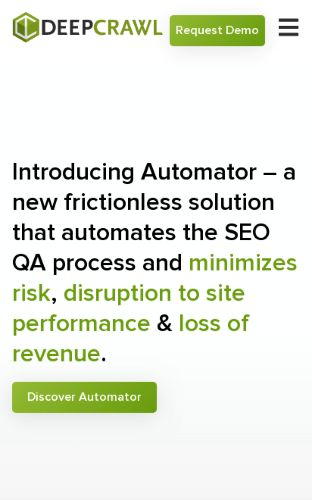
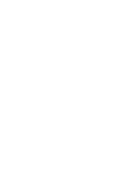
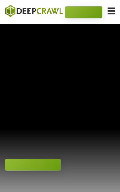
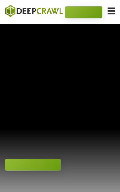
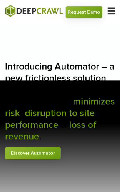
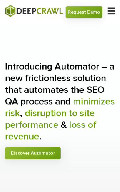
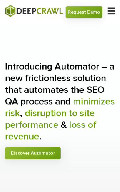
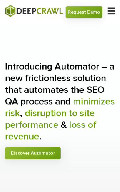
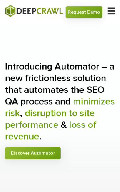
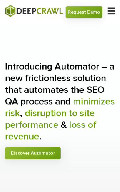
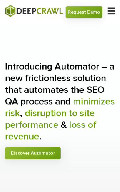
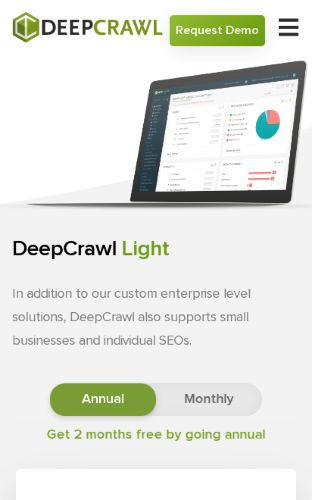
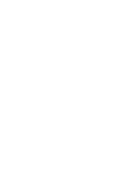
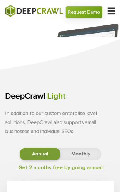
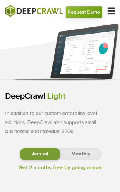
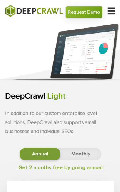
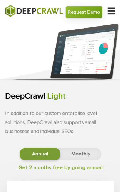
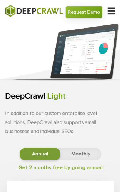
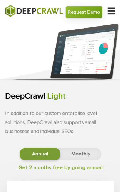
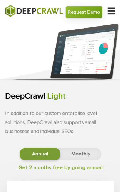
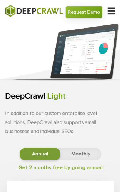
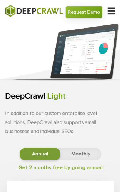
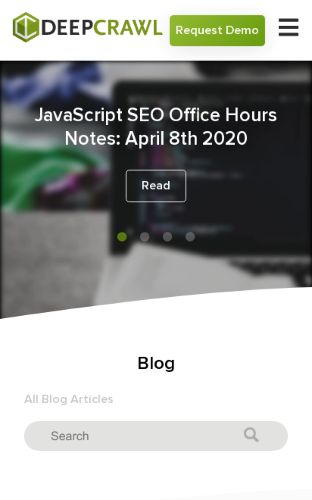
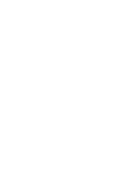
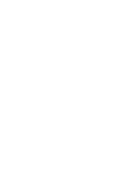
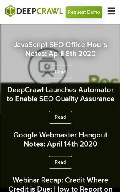
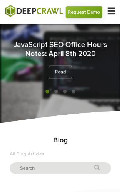
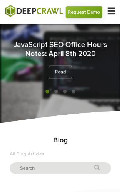
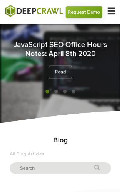
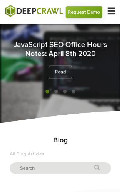
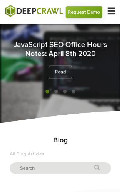
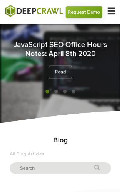
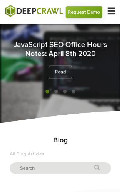
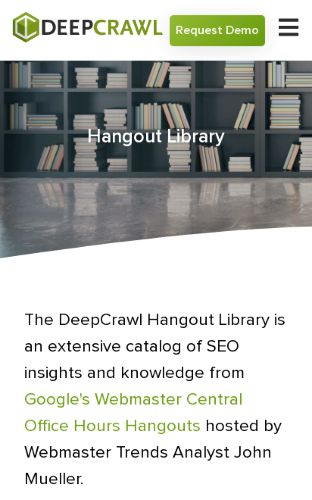
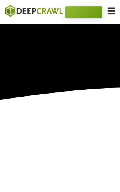
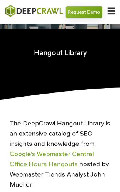
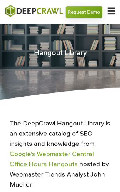
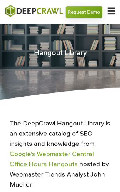
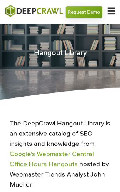
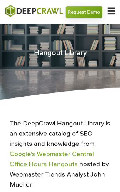
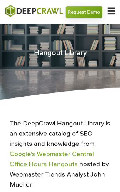
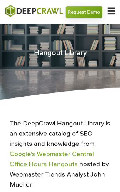
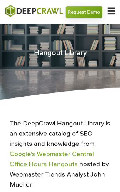
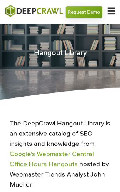
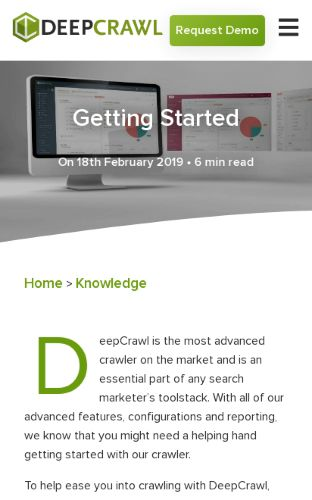
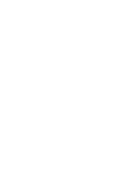
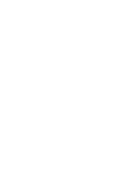
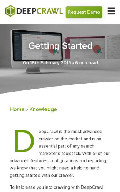
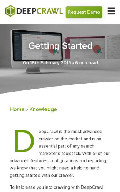
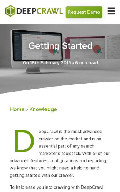
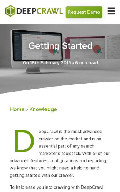
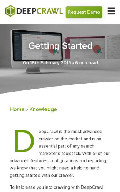
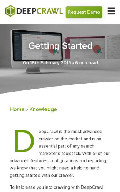
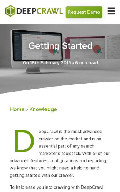
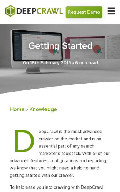
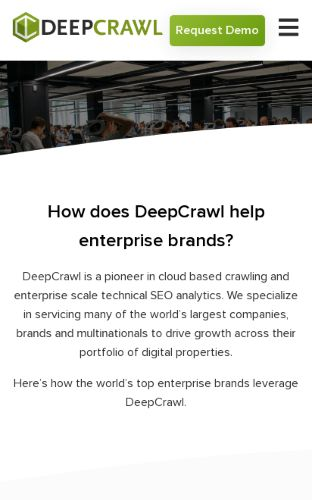
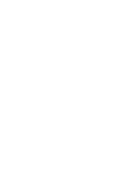
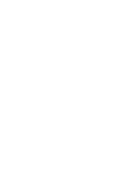
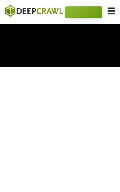
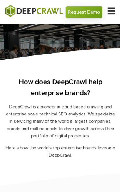
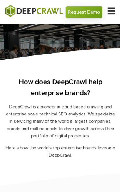
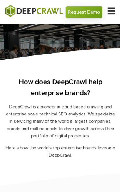
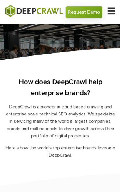
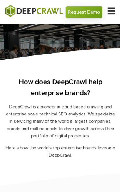
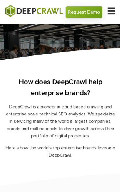
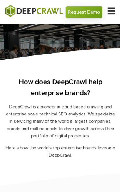
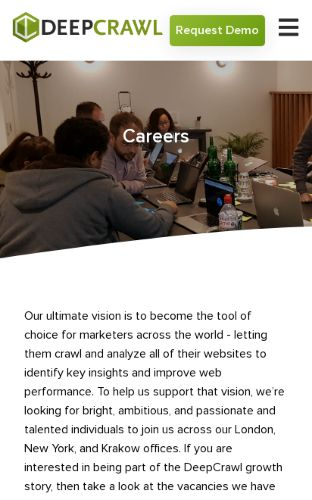
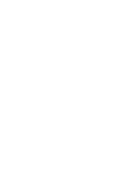
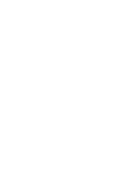
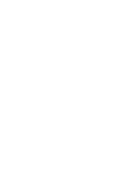
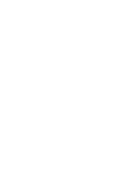
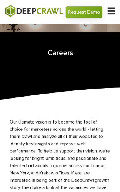
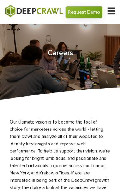
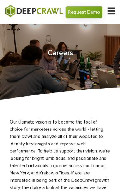
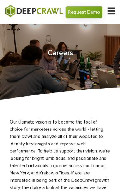
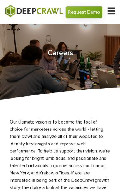
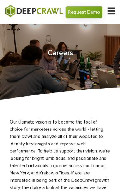
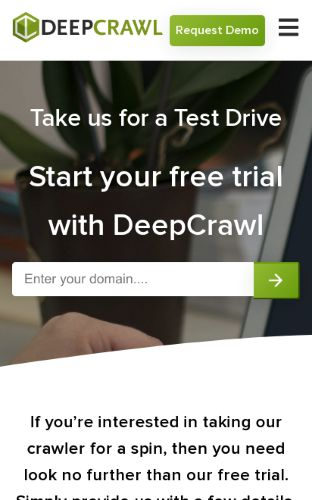
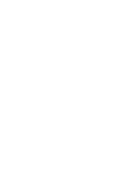
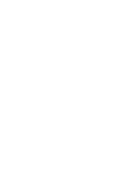
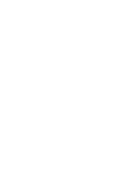
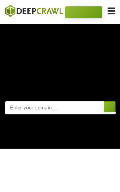
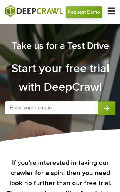
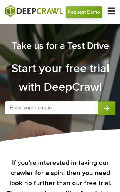
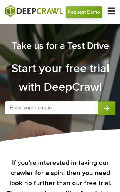
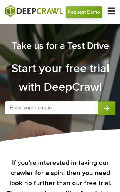
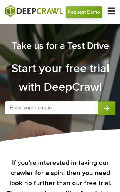
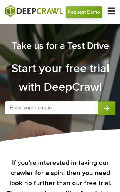
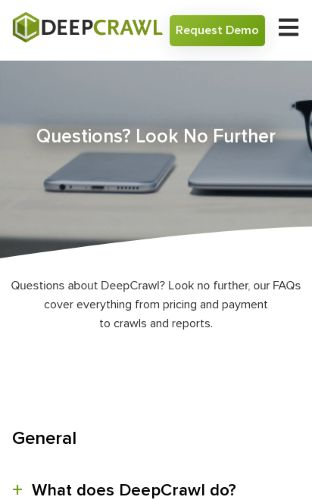
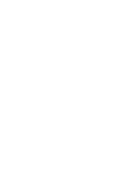
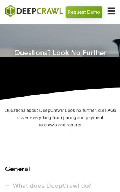
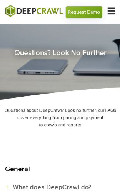
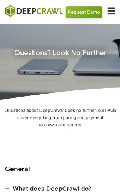
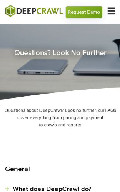
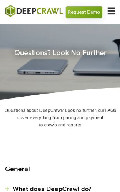
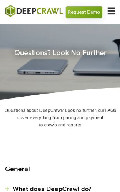
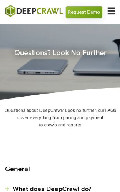
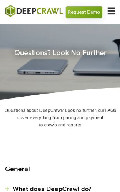
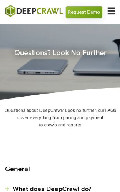

In [ ]:
response_object = {}


# Iterate through the df
for i in range(0, len(df)):

        #print('Requesting row #:', i)

        # Define request parameter
        url = df.iloc[i][column_header]

        # Make request
        pagespeed_results = urllib.request.urlopen('https://www.googleapis.com/pagespeedonline/v5/runPagespeed?url={}&strategy=mobile'\
            .format(url)).read().decode('UTF-8')

        # Convert to json format
        pagespeed_results_json = json.loads(pagespeed_results)

        # Insert returned json response into response_object
        response_object[url] = pagespeed_results_json
        time.sleep(30)
        
        print(response_object[url])

        #Optional download of json files, comment out to skip this step 
        #with open('pagespeed_results_json', 'w') as outfile:
            #json.dump(response_object[url], outfile)
        
        #files.download('pagespeed_results_json')

Create dataframe to store responses


In [ ]:
# Create dataframe to store field data responses
df_pagespeed_results = pd.DataFrame(
columns=['url',
         'FCP_category',
         'FCP_percentile',
         'FID_category',
         'FID_percentile',
         'Time_to_Interactive',
         'Speed_Index',
         'First_CPU_Idle',
         'First_Meaningful_Paint',
         'TTFB',
         'Total_Blocking_Time'])  

print(df_pagespeed_results)

Empty DataFrame
Columns: [url, FCP_category, FCP_percentile, FID_category, FID_percentile, Time_to_Interactive, Speed_Index, First_CPU_Idle, First_Meaningful_Paint, TTFB, Total_Blocking_Time]
Index: []


Iterate through the response object to pull out desired metrics


In [ ]:
for (url, i) in zip(
    response_object.keys(),
    range(0, len(response_object))
):

        # URLs
        df_pagespeed_results.loc[i, 'url'] =\
            response_object[url]['lighthouseResult']['finalUrl']

        # First Contentful Paint 
        fcp = response_object[url]\
            ['loadingExperience']['metrics']['FIRST_CONTENTFUL_PAINT_MS']

        # First Input Delay 
        fid = response_object[url]\
            ['loadingExperience']['metrics']['FIRST_INPUT_DELAY_MS']

        # First Contentful Paint Metrics     
        df_pagespeed_results.loc[i, 'FCP_category'] = fcp['category']
        df_pagespeed_results.loc[i, 'FCP_percentile'] = fcp['percentile']

        # First Input Delay Metrics     
        df_pagespeed_results.loc[i, 'FID_category'] = fid['category']
        df_pagespeed_results.loc[i, 'FID_percentile'] = fid['percentile']

        # Time to Interactive  
        df_pagespeed_results.loc[i, 'Time_to_Interactive'] =\
        response_object[url]['lighthouseResult']['audits']['interactive']['displayValue']

        # Speed Index
        df_pagespeed_results.loc[i, 'Speed_Index'] =\
        response_object[url]['lighthouseResult']['audits']['speed-index']['displayValue']

        # First CPU Idle
        df_pagespeed_results.loc[i, 'First_CPU_Idle'] =\
        response_object[url]['lighthouseResult']['audits']['first-cpu-idle']['displayValue']

        # First Meaningful Paint    
        df_pagespeed_results.loc[i, 'First_Meaningful_Paint'] =\
        response_object[url]['lighthouseResult']['audits']['first-meaningful-paint']['displayValue']

         # Time to First Byte    
        df_pagespeed_results.loc[i, 'TTFB'] =\
        response_object[url]['lighthouseResult']['audits']['time-to-first-byte']['displayValue']

        # Total Blocking Time   
        df_pagespeed_results.loc[i, 'Total_Blocking_Time'] =\
        response_object[url]['lighthouseResult']['audits']['total-blocking-time']['displayValue']

        #print(df_pagespeed_results)


Create a summary dataframe of the results collected 




In [ ]:
summary = df_pagespeed_results

df_pagespeed_results.head()

,url,FCP_category,FCP_percentile,FID_category,FID_percentile,Time_to_Interactive,Speed_Index,First_CPU_Idle,First_Meaningful_Paint,TTFB,Total_Blocking_Time
0,https://www.deepcrawl.com/,AVERAGE,2293,AVERAGE,125,8.1 s,4.4 s,7.7 s,3.4 s,Root document took 120 ms,"1,210 ms"
1,https://www.deepcrawl.com/deepcrawl-light/,AVERAGE,2947,AVERAGE,247,8.8 s,3.8 s,8.2 s,3.7 s,Root document took 40 ms,"1,330 ms"
2,https://www.deepcrawl.com/blog/,AVERAGE,2947,AVERAGE,247,9.4 s,4.7 s,7.6 s,3.8 s,Root document took 500 ms,"1,130 ms"
3,https://www.deepcrawl.com/knowledge/hangout-li...,AVERAGE,2947,AVERAGE,247,9.4 s,3.4 s,7.7 s,3.8 s,Root document took 40 ms,"1,280 ms"
4,https://www.deepcrawl.com/knowledge/getting-st...,AVERAGE,2947,AVERAGE,247,10.6 s,4.2 s,7.6 s,3.4 s,Root document took 480 ms,850 ms


Download the csv file


In [ ]:
#Download csv file 
summary.to_csv('pagespeed_results.csv')
files.download('pagespeed_results.csv')